# Pragmatic Markers

Hedges
Boosters
intensifiers
softeners


In [29]:
from helpers.normalization import remove_punctuation_and_newlines, remove_capitalization
import os
import pandas as pd
import sqlite3
import re
import matplotlib.pyplot as plt
import seaborn as sns


from helpers.occurences import count_occurrences, count_punctuation
from helpers.statistical_tests import run_t_test_on_gender

db_path = "../../../data/giicg.db"
if not os.path.exists(db_path):
    raise FileNotFoundError(f"Database file does not exist: {db_path}")

conn = sqlite3.connect(db_path)
prompts = pd.read_sql("SELECT ep.*, u.age, u.work_exp_years FROM expanded_prompts ep JOIN users u ON ep.user_id = u.user_id", conn)
prompts = prompts.dropna(subset=['conversational'])
prompts = prompts[prompts['conversational'].str.strip() != '']
prompts = prompts.dropna(subset=['conversational'])
prompts['conversational'] = prompts['conversational'].apply(remove_punctuation_and_newlines)
prompts['conversational'] = prompts['conversational'].apply(remove_capitalization)
user_prompts = (
    prompts
    .fillna({'work_exp_years': 'None'})
    .groupby(['user_id', 'gender', 'age', 'work_exp_years'])['conversational']
    .apply(' '.join)
    .reset_index()    # Reset index to create a DataFrame
)
user_prompts= user_prompts[user_prompts['gender'].isin(['Man (cisgender)', 'Woman (cisgender)'])]
user_prompts

,user_id,gender,age,work_exp_years,conversational
0,6,Man (cisgender),19-25,3.0,parsing data from python iterator how it could...
1,8,Man (cisgender),19-25,1.0,i am working on the problem of reconstruc...
2,11,Woman (cisgender),26-30,1.0,can you adapt the following code so that inste...
3,15,Man (cisgender),26-30,6.0,setalltables action is currently not fetching ...
4,16,Woman (cisgender),19-25,None,i want to use dummy hot encoding to replace th...
5,25,Man (cisgender),26-30,6.0,what is the best way to encode and compress a ...
6,28,Woman (cisgender),31-35,5.0,i have a pandas dataframe like this i want to...
7,29,Woman (cisgender),26-30,None,now i want to bring judgement balancing into t...
9,31,Man (cisgender),36-40,22.0,how can i make use of an observablehqdatabasec...
10,34,Man (cisgender),51-60,20.0,blender and python i have a collection of hund...


## Linguistic uncertainty and boosters

In [30]:
uncertainty_markers = ['maybe', 'type of', 'likely', 'guess', 'not sure', 'think', 'somehow', 'however', 'something', 'quite', 'actually' ]
modal_auxiliary_verbs= ['would', 'can', 'will', 'should', 'could', 'must']
boosters = ['cool', 'great', 'totally', 'perfect', 'nice', 'funny' ]
apologies = ['sorry', 'ups']
other_other = ['ah', 'lol']

words = uncertainty_markers + modal_auxiliary_verbs + boosters + apologies + other_other

## Count normalized by number of words per user

In [31]:

user_prompts['n_words'] = user_prompts['conversational'].apply(lambda x: len(x.split()))

for word in words:
    user_prompts[word] = user_prompts.apply(
        lambda row: count_occurrences(row['conversational'], word) / row['n_words']
        if row['n_words'] > 0 else 0,
        axis=1
    )

user_prompts['uncertainty_markers'] = user_prompts[uncertainty_markers].sum(axis=1)
user_prompts['modal_auxiliary_verbs'] = user_prompts[modal_auxiliary_verbs].sum(axis=1)
user_prompts['boosters'] = user_prompts[boosters].sum(axis=1)
#user_prompts['apologies'] = user_prompts[apologies].sum(axis=1)
#user_prompts['other_other'] = user_prompts[other_other].sum(axis=1)

user_prompts


,user_id,gender,age,work_exp_years,conversational,n_words,maybe,type of,likely,guess,...,perfect,nice,funny,sorry,ups,ah,lol,uncertainty_markers,modal_auxiliary_verbs,boosters
0,6,Man (cisgender),19-25,3.0,parsing data from python iterator how it could...,192,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.010417,0.000000
1,8,Man (cisgender),19-25,1.0,i am working on the problem of reconstruc...,36,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
2,11,Woman (cisgender),26-30,1.0,can you adapt the following code so that inste...,193,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.056995,0.000000
3,15,Man (cisgender),26-30,6.0,setalltables action is currently not fetching ...,36,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
4,16,Woman (cisgender),19-25,None,i want to use dummy hot encoding to replace th...,541,0.003697,0.000000,0.000000,0.00000,...,0.001848,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.005545,0.038817,0.001848
5,25,Man (cisgender),26-30,6.0,what is the best way to encode and compress a ...,106,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.009434,0.018868,0.000000
6,28,Woman (cisgender),31-35,5.0,i have a pandas dataframe like this i want to...,562,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.001779,0.00000,0.00000,0.00000,0.000000,0.00000,0.001779,0.024911,0.003559
7,29,Woman (cisgender),26-30,None,now i want to bring judgement balancing into t...,60,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.016667,0.000000
9,31,Man (cisgender),36-40,22.0,how can i make use of an observablehqdatabasec...,92,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.032609,0.000000
10,34,Man (cisgender),51-60,20.0,blender and python i have a collection of hund...,1299,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000770,0.00000,0.00077,0.00077,0.000000,0.00000,0.003849,0.022325,0.000770


## Plot

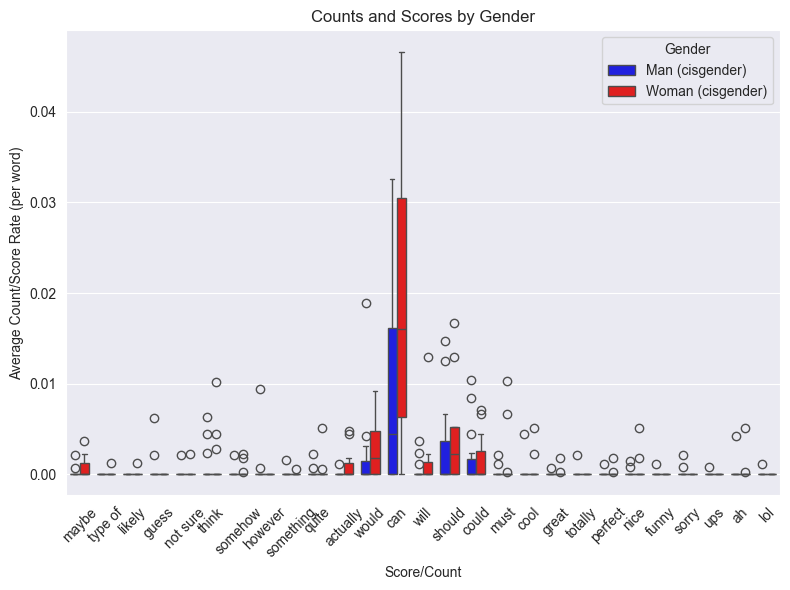

In [27]:
melted = user_prompts.melt(
    id_vars=['user_id', 'gender'],
    value_vars=words,
    var_name='Score/Count',
    value_name='Normalized Rate'
)

plt.figure(figsize=(8,6))
sns.boxplot(
    data=melted,
    x='Score/Count',
    y='Normalized Rate',
    hue='gender',
    palette={'Woman (cisgender)': 'red', 'Man (cisgender)': 'blue'},
    width=0.7
)

plt.title('Counts and Scores by Gender')
plt.ylabel('Average Count/Score Rate (per word)')
plt.xlabel('Score/Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Statistical Tests

In [21]:
from helpers.statistical_tests import compare_genders
from statsmodels.stats.multitest import multipletests

p_vals = []
for col in words:
    p_vals.append(compare_genders(user_prompts, col))
reject, pvals_corrected, _, _ = multipletests(p_vals, alpha=0.05, method='fdr_bh')

for column, raw, corrected, rej in zip(words, p_vals, pvals_corrected, reject):
    print(f"{column}: raw p={raw:.4f}, FDR: {corrected:.4f}")

maybe:
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
Normality test (Shapiro-Wilk) for maybe:
  Female: stat=0.6594, p-value=0.0002 (not normal)
  Male:   stat=0.3970, p-value=0.0000 (not normal)
At least one of the distributions is not normal, so we cannot run a t-test.
Mann-Whitney U test: stat=78.5000, p-value=0.2352
sort of:
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
Normality test (Shapiro-Wilk) for sort of:
  Female: stat=1.0000, p-value=1.0000 (normal)
  Male:   stat=1.0000, p-value=1.0000 (normal)
Both distributions are normal, so we can run a t-test.
  T-statistic: nan, p-value: nan
type of:
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
Normality test (Shapiro-Wilk) for type of:
  Female: stat=0.3110, p-value=0.0000 (not normal)
  Male:   stat=1.0000, p-value=1.0000 (normal)
At least one of the distributions is not normal, so we cannot run a t-test.
Mann-Whitney U test: stat=90.0000, p-value=0.3161
probably:
  Female: n=

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


## Grouped Counts

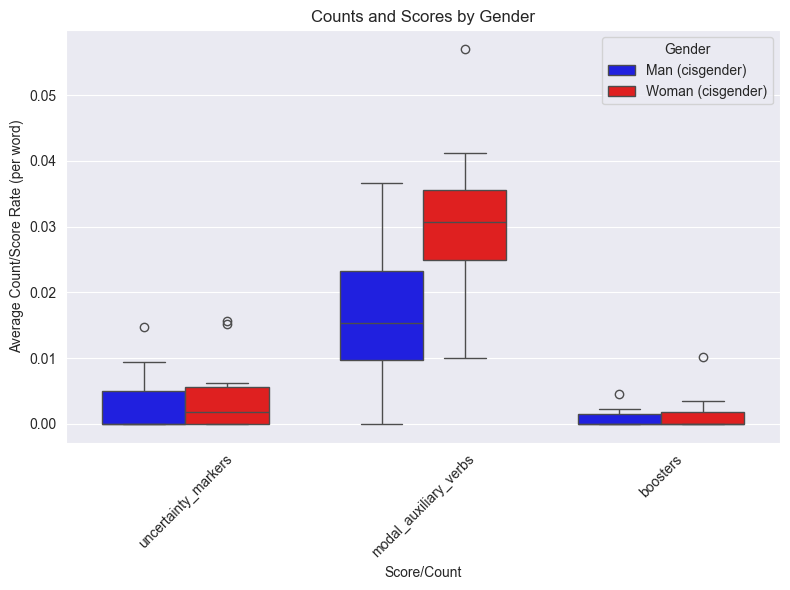

uncertainty_markers:
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
Normality test (Shapiro-Wilk) for uncertainty_markers:
  Female: stat=0.7516, p-value=0.0019 (not normal)
  Male:   stat=0.7165, p-value=0.0004 (not normal)
At least one of the distributions is not normal, so we cannot run a t-test.
Mann-Whitney U test: stat=85.0000, p-value=0.5480
modal_auxiliary_verbs:
  Female: n=13, variance=0.0002
  Male:   n=15, variance=0.0001
Normality test (Shapiro-Wilk) for modal_auxiliary_verbs:
  Female: stat=0.9685, p-value=0.8754 (normal)
  Male:   stat=0.9381, p-value=0.3588 (normal)
Both distributions are normal, so we can run a t-test.
  T-statistic: -2.7794, p-value: 0.0101
boosters:
  Female: n=13, variance=0.0000
  Male:   n=15, variance=0.0000
Normality test (Shapiro-Wilk) for boosters:
  Female: stat=0.5784, p-value=0.0000 (not normal)
  Male:   stat=0.6521, p-value=0.0001 (not normal)
At least one of the distributions is not normal, so we cannot run a t-test.
Man

In [33]:
columns = ['uncertainty_markers', 'modal_auxiliary_verbs', 'boosters']

melted = user_prompts.melt(
    id_vars=['user_id', 'gender'],
    value_vars=columns,
    var_name='Score/Count',
    value_name='Normalized Rate'
)

plt.figure(figsize=(8,6))
sns.boxplot(
    data=melted,
    x='Score/Count',
    y='Normalized Rate',
    hue='gender',
    palette={'Woman (cisgender)': 'red', 'Man (cisgender)': 'blue'},
    width=0.7
)

plt.title('Counts and Scores by Gender')
plt.ylabel('Average Count/Score Rate (per word)')
plt.xlabel('Score/Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

p_vals = []
for col in columns:
    p_vals.append(compare_genders(user_prompts, col))
reject, pvals_corrected, _, _ = multipletests(p_vals, alpha=0.05, method='fdr_bh')

for column, raw, corrected, rej in zip(columns, p_vals, pvals_corrected, reject):
    print(f"{column}: raw p={raw:.4f}, FDR: {corrected:.4f}")

## Hedge detection model -doesnt work

In [8]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
from scipy.special import softmax
import torch

def load_model(path):
    tokenizer = AutoTokenizer.from_pretrained(path)
    config = AutoConfig.from_pretrained(path)
    model = AutoModelForSequenceClassification.from_pretrained(path)
    model.save_pretrained(path)
    tokenizer.save_pretrained(path)
    return model, tokenizer, config

def analyze_hedge_occurence(text, model, tokenizer, max_length=512):
    try:
        # Ensure text is a string and handle empty/None values
        if not text or not isinstance(text, str):
            return [0.5, 0.5]  # neutral default

        # Tokenize with proper truncation and padding
        encoded_input = tokenizer(
            text,
            return_tensors='pt',
            max_length=max_length,
            truncation=True,
            padding=True
        )

        # Run the model
        with torch.no_grad():  # Disable gradient computation for efficiency
            output = model(**encoded_input)

        # Extract logits and apply softmax
        logits = output.logits[0].detach().numpy()
        scores = softmax(logits)
        print(scores)

        return scores.tolist()

    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return [0.5, 0.5]  # neutral default on error


def process_row(text):
    scores = analyze_hedge_occurence(text, model, tokenizer)
    return pd.Series(scores, index=['no_hedge', 'hedge'])


path = f"../ChrisLiewJY/BERTweet-Hedge"
model, tokenizer, config = load_model(path)
prompts[['no_hedge', 'hedge']] = prompts['conversational'].apply(process_row)

prompts

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[0.9761486  0.02385141]
Error processing text: index out of range in self
[9.9920005e-01 8.0000970e-04]
[9.991043e-01 8.956604e-04]
[9.9919826e-01 8.0178026e-04]
[0.99890435 0.00109568]
[9.9905795e-01 9.4203505e-04]
[9.9910480e-01 8.9511566e-04]
[0.9982711  0.00172887]
[0.9986707  0.00132932]
[0.9971469 0.0028531]
[0.9974903 0.0025097]
[0.9983876  0.00161243]
[0.9977187  0.00228132]
[0.9942188  0.00578113]
[0.9986608  0.00133917]
[0.9983607 0.0016393]
[9.9907768e-01 9.2227024e-04]
[0.9949904  0.00500955]
[0.91004723 0.0899528 ]
[0.9989473  0.00105276]
[0.9982551  0.00174489]
[0.0451876  0.95481235]
[0.99698335 0.00301664]
[0.9985588  0.00144121]
[0.9916762  0.00832379]
[0.9943299  0.00567006]
[0.9497983  0.05020167]
[9.9910104e-01 8.9903304e-04]
Error processing text: index out of range in self
[0.04116958 0.9588304 ]
[0.99704725 0.00295281]
[0.99669504 0.00330501]
[0.48275682 0.5172432 ]
[0.9988165  0.00118357]
[0.9975085  0.00249147]
[0.0309949  0.96900505]
[9.991198e-01 8.802376e-04

,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language,no_hedge,hedge
0,1,1,user,"parsing data from python iterator, how it coul...","parsing data from python iterator, how it coul...",,,Man (cisgender),6,en,0.976149,0.023851
1,730,32,user,Write python function to do operations with in...,Write python function to do operations with in...,,report_dt\tsource\tmetric_name\tmetric_num\tme...,Man (cisgender),6,en,0.500000,0.500000
2,1133,55,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en,0.999200,0.000800
3,1135,55,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en,0.999104,0.000896
4,1137,55,user,Transform given code to process large .mbox file,Transform given code to process large .mbox file,,Transform given code to process large .mbox file,Man (cisgender),6,en,0.999198,0.000802
...,...,...,...,...,...,...,...,...,...,...,...,...
756,1646,82,user,"def run_query(query, n_results):\n query_em...",this is my code. I want to: Get nodes and edge...,"def run_query(query, n_results):\n query_em...",,Man (cisgender),92,en,0.132448,0.867552
757,1845,37,user,\n nun möchte ich judgement balancing m...,Now I want to bring judgement balancing into t...,,,Woman (cisgender),29,de,0.996723,0.003277
758,1847,37,user,\n ich sehe keine veränderung im Plot. Was ...,I do not see any change in the plot.,,,Woman (cisgender),29,de,0.995972,0.004028
759,1849,2,user,\n I am working on the problem of reconstru...,\n I am working on the problem of reconstru...,,Classic CV - Drone navigation\nIf you ever tho...,Man (cisgender),8,en,0.998921,0.001079


## Adjectives
normal
comparatvive
superlative

using spacy

## Formality
using GPT 4.1?